In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('preprocessed_data.csv')

# Assuming the last column is the target variable (y), and the rest are features (X)
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example: Check the shape of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (36168, 42)
X_test shape: (9043, 42)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   default              45211 non-null  int64  
 2   balance              45211 non-null  float64
 3   housing              45211 non-null  int64  
 4   loan                 45211 non-null  int64  
 5   day                  45211 non-null  int64  
 6   duration             45211 non-null  float64
 7   campaign             45211 non-null  float64
 8   pdays                45211 non-null  float64
 9   previous             45211 non-null  float64
 10  job_blue-collar      45211 non-null  int64  
 11  job_entrepreneur     45211 non-null  int64  
 12  job_housemaid        45211 non-null  int64  
 13  job_management       45211 non-null  int64  
 14  job_retired          45211 non-null  int64  
 15  job_self-employed    45211 non-null 

In [9]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: y
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


# Model 

Epoch 1/20, Loss: 0.2989, Accuracy: 0.8898
Epoch 2/20, Loss: 0.2471, Accuracy: 0.8989
Epoch 3/20, Loss: 0.2328, Accuracy: 0.9021
Epoch 4/20, Loss: 0.2266, Accuracy: 0.9042
Epoch 5/20, Loss: 0.2214, Accuracy: 0.9036
Epoch 6/20, Loss: 0.2165, Accuracy: 0.9049
Epoch 7/20, Loss: 0.2133, Accuracy: 0.9067
Epoch 8/20, Loss: 0.2098, Accuracy: 0.9067
Epoch 9/20, Loss: 0.2071, Accuracy: 0.9076
Epoch 10/20, Loss: 0.2061, Accuracy: 0.9075
Epoch 11/20, Loss: 0.2027, Accuracy: 0.9088
Epoch 12/20, Loss: 0.2016, Accuracy: 0.9087
Epoch 13/20, Loss: 0.1997, Accuracy: 0.9094
Epoch 14/20, Loss: 0.1987, Accuracy: 0.9104
Epoch 15/20, Loss: 0.1980, Accuracy: 0.9110
Epoch 16/20, Loss: 0.1962, Accuracy: 0.9117
Epoch 17/20, Loss: 0.1953, Accuracy: 0.9116
Epoch 18/20, Loss: 0.1941, Accuracy: 0.9120
Epoch 19/20, Loss: 0.1930, Accuracy: 0.9125
Epoch 20/20, Loss: 0.1927, Accuracy: 0.9136


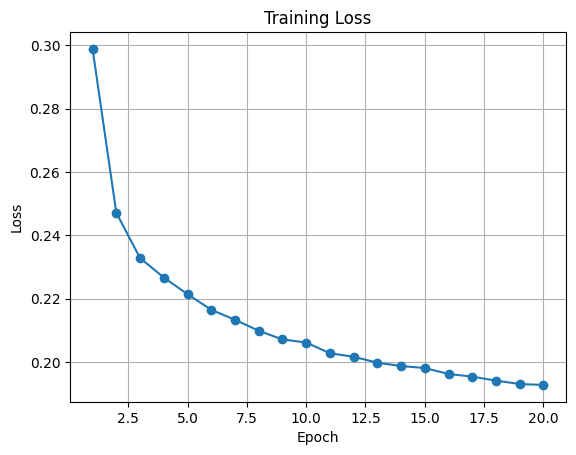

Accuracy: 0.9031294924250802
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



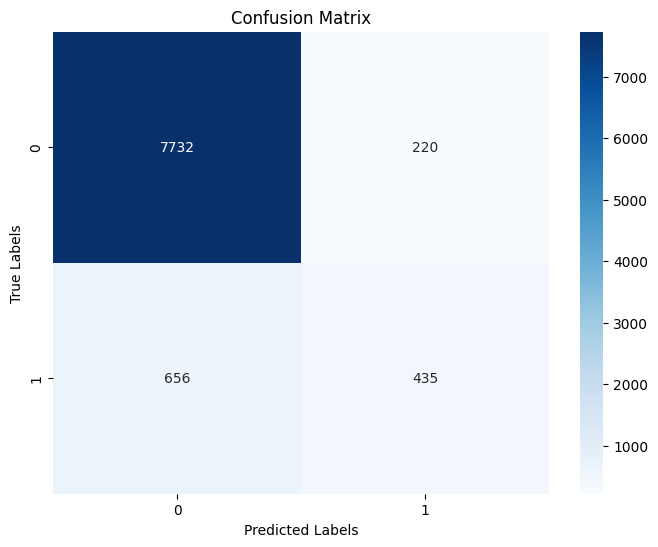

In [10]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from torch.utils.data import DataLoader, TensorDataset

# # Ensure reproducibility
# torch.manual_seed(42)

# # Convert preprocessed DataFrames to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# # Device setup
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
# X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# # Create DataLoader for batching
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # Neural Network Model
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
#         self.relu = nn.ReLU()                         # Activation function
#         self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Define model parameters
# input_size = X_train.shape[1]  # Number of features
# hidden_size = 64               # Number of neurons in the hidden layer
# output_size = len(y_train.unique())  # Number of output classes

# # Initialize the model
# model = NeuralNet(input_size, hidden_size, output_size).to(device)
# criterion = nn.CrossEntropyLoss()  # Loss function for classification
# optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# # Training the model
# epochs = 20
# losses = []

# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0
#     correct = 0
#     total = 0
#     for X_batch, y_batch in train_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         # Forward pass
#         outputs = model(X_batch)
#         loss = criterion(outputs, y_batch)

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()
#         _, predicted = torch.max(outputs, 1)
#         correct += (predicted == y_batch).sum().item()
#         total += y_batch.size(0)

#     epoch_accuracy = correct / total
#     losses.append(epoch_loss / len(train_loader))
#     print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

# # Plot training loss
# plt.plot(range(1, epochs + 1), losses, marker='o')
# plt.title("Training Loss")
# plt.xlabel("Epoch")
# plt.ylabel("Loss")
# plt.grid()
# plt.show()

# # Evaluation
# model.eval()
# y_pred = []
# y_true = []

# with torch.no_grad():
#     for X_batch, y_batch in test_loader:
#         X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#         outputs = model(X_batch)
#         _, predicted = torch.max(outputs, 1)
#         y_pred.extend(predicted.cpu().numpy())
#         y_true.extend(y_batch.cpu().numpy())

# # Metrics
# print("Accuracy:", accuracy_score(y_true, y_pred))
# print("Classification Report:")
# print(classification_report(y_true, y_pred))

# # Confusion Matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
# plt.title("Confusion Matrix")
# plt.xlabel("Predicted Labels")
# plt.ylabel("True Labels")
# plt.show()

# # # Save the model
# # torch.save(model.state_dict(), 'neural_net_model.pth')
# # print("Model saved as 'neural_net_model.pth'")


Epoch 1/20, Loss: 0.2989, Accuracy: 0.8898
Epoch 2/20, Loss: 0.2471, Accuracy: 0.8989
Epoch 3/20, Loss: 0.2328, Accuracy: 0.9021
Epoch 4/20, Loss: 0.2266, Accuracy: 0.9042
Epoch 5/20, Loss: 0.2214, Accuracy: 0.9036
Epoch 6/20, Loss: 0.2165, Accuracy: 0.9049
Epoch 7/20, Loss: 0.2133, Accuracy: 0.9067
Epoch 8/20, Loss: 0.2098, Accuracy: 0.9067
Epoch 9/20, Loss: 0.2071, Accuracy: 0.9076
Epoch 10/20, Loss: 0.2061, Accuracy: 0.9075
Epoch 11/20, Loss: 0.2027, Accuracy: 0.9088
Epoch 12/20, Loss: 0.2016, Accuracy: 0.9087
Epoch 13/20, Loss: 0.1997, Accuracy: 0.9094
Epoch 14/20, Loss: 0.1987, Accuracy: 0.9104
Epoch 15/20, Loss: 0.1980, Accuracy: 0.9110
Epoch 16/20, Loss: 0.1962, Accuracy: 0.9117
Epoch 17/20, Loss: 0.1953, Accuracy: 0.9116
Epoch 18/20, Loss: 0.1941, Accuracy: 0.9120
Epoch 19/20, Loss: 0.1930, Accuracy: 0.9125
Epoch 20/20, Loss: 0.1927, Accuracy: 0.9136


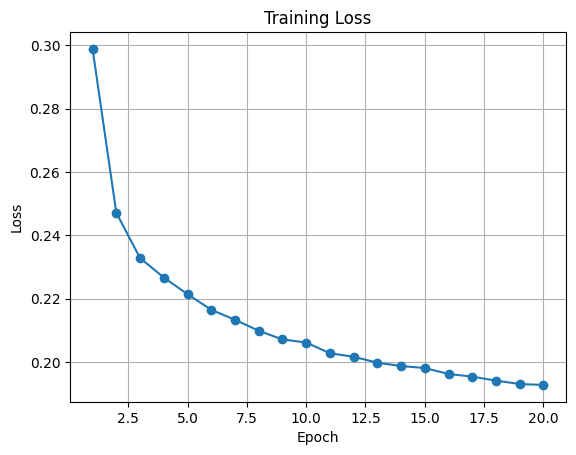

Training Accuracy: 0.9150353904003539
Test Accuracy: 0.9031294924250802
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.66      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



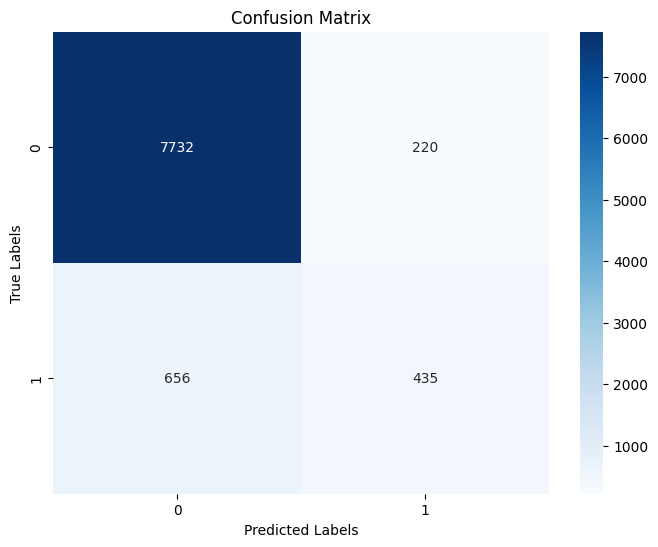

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from torch.utils.data import DataLoader, TensorDataset

# Ensure reproducibility
torch.manual_seed(42)

# Convert preprocessed DataFrames to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train_tensor, y_train_tensor = X_train_tensor.to(device), y_train_tensor.to(device)
X_test_tensor, y_test_tensor = X_test_tensor.to(device), y_test_tensor.to(device)

# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Neural Network Model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.relu = nn.ReLU()                         # Activation function
        self.fc2 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Define model parameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 64               # Number of neurons in the hidden layer
output_size = len(y_train.unique())  # Number of output classes

# Initialize the model
model = NeuralNet(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()  # Loss function for classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

# Training the model
epochs = 20
losses = []

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    epoch_accuracy = correct / total
    losses.append(epoch_loss / len(train_loader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}, Accuracy: {epoch_accuracy:.4f}")

# Plot training loss
plt.plot(range(1, epochs + 1), losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.show()

# Evaluation
# Training Accuracy
model.eval()
y_train_pred = []
y_train_true = []

with torch.no_grad():
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_train_pred.extend(predicted.cpu().numpy())
        y_train_true.extend(y_batch.cpu().numpy())

print("Training Accuracy:", accuracy_score(y_train_true, y_train_pred))

# Test Accuracy
y_test_pred = []
y_test_true = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_test_pred.extend(predicted.cpu().numpy())
        y_test_true.extend(y_batch.cpu().numpy())

print("Test Accuracy:", accuracy_score(y_test_true, y_test_pred))

# Classification Report for Test Data
print("Classification Report:")
print(classification_report(y_test_true, y_test_pred))


# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# # Save the model
# torch.save(model.state_dict(), 'neural_net_model.pth')
# print("Model saved as 'neural_net_model.pth'")


# Tunning 

In [11]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from sklearn.metrics import accuracy_score
# from torch.utils.data import DataLoader, TensorDataset

# # Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Define the Neural Network
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Function to train the model
# def train_model(model, train_loader, criterion, optimizer, device, epochs=20):
#     model.train()
#     for epoch in range(epochs):
#         epoch_loss = 0
#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()
#         print(f"Epoch {epoch + 1}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

# # Function to evaluate the model
# def evaluate_model(model, test_loader, device):
#     model.eval()
#     y_pred, y_true = [], []
#     with torch.no_grad():
#         for X_batch, y_batch in test_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
#             y_true.extend(y_batch.cpu().numpy())
#     return accuracy_score(y_true, y_pred)

# # Hyperparameter search
# hidden_sizes = [32, 64, 128]
# learning_rates = [0.001, 0.01, 0.1]
# batch_sizes = [16, 32, 64]

# best_accuracy = 0
# best_hyperparameters = {}

# for hidden_size in hidden_sizes:
#     for lr in learning_rates:
#         for batch_size in batch_sizes:
#             # Prepare data loaders
#             train_dataset = TensorDataset(torch.tensor(X_train.values, dtype=torch.float32),
#                                            torch.tensor(y_train.values, dtype=torch.long))
#             test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),
#                                           torch.tensor(y_test.values, dtype=torch.long))
#             train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#             test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#             # Initialize model, loss, and optimizer
#             model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
#             criterion = nn.CrossEntropyLoss()
#             optimizer = optim.Adam(model.parameters(), lr=lr)

#             # Train and evaluate
#             train_model(model, train_loader, criterion, optimizer, device, epochs=20)
#             accuracy = evaluate_model(model, test_loader, device)

#             # Save best hyperparameters
#             if accuracy > best_accuracy:
#                 best_accuracy = accuracy
#                 best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}

#             print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Accuracy: {accuracy:.4f}")

# # Output the best hyperparameters
# print(f"Best Hyperparameters: {best_hyperparameters}")
# print(f"Best Accuracy: {best_accuracy:.4f}")


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Define the model
# class NeuralNet(nn.Module):
#     def __init__(self, input_size, hidden_size, output_size):
#         super(NeuralNet, self).__init__()
#         self.fc1 = nn.Linear(input_size, hidden_size)
#         self.relu = nn.ReLU()
#         self.fc2 = nn.Linear(hidden_size, output_size)

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.relu(x)
#         x = self.fc2(x)
#         return x

# # Evaluate the model
# def evaluate_model(model, data_loader, device):
#     model.eval()
#     y_pred, y_true = [], []
#     with torch.no_grad():
#         for X_batch, y_batch in data_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             outputs = model(X_batch)
#             _, predicted = torch.max(outputs, 1)
#             y_pred.extend(predicted.cpu().numpy())
#             y_true.extend(y_batch.cpu().numpy())
#     return accuracy_score(y_true, y_pred)

# # Train the model with early stopping
# def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, device, epochs=20, patience=5):
#     model.train()
#     best_val_loss = float('inf')
#     patience_counter = 0

#     for epoch in range(epochs):
#         epoch_loss = 0
#         model.train()
#         for X_batch, y_batch in train_loader:
#             X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#             optimizer.zero_grad()
#             outputs = model(X_batch)
#             loss = criterion(outputs, y_batch)
#             loss.backward()
#             optimizer.step()
#             epoch_loss += loss.item()

#         # Validate the model
#         val_loss = 0
#         model.eval()
#         with torch.no_grad():
#             for X_batch, y_batch in val_loader:
#                 X_batch, y_batch = X_batch.to(device), y_batch.to(device)
#                 outputs = model(X_batch)
#                 loss = criterion(outputs, y_batch)
#                 val_loss += loss.item()
#         val_loss /= len(val_loader)

#         print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_loss / len(train_loader):.4f}, Val Loss: {val_loss:.4f}")

#         # Check early stopping condition
#         if val_loss < best_val_loss:
#             best_val_loss = val_loss
#             patience_counter = 0
#         else:
#             patience_counter += 1
#             if patience_counter >= patience:
#                 print(f"Early stopping triggered after {epoch + 1} epochs.")
#                 break

# # Hyperparameter tuning
# def tune_hyperparameters(X_train, y_train, X_test, y_test, hidden_sizes, learning_rates, batch_sizes):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     best_accuracy = 0
#     best_hyperparameters = {}

#     # Split training data into training and validation sets
#     X_train_split, X_val, y_train_split, y_val = train_test_split(
#         X_train, y_train, test_size=0.2, random_state=42
#     )

#     for hidden_size in hidden_sizes:
#         for lr in learning_rates:
#             for batch_size in batch_sizes:
#                 # Create DataLoaders
#                 train_dataset = TensorDataset(torch.tensor(X_train_split.values, dtype=torch.float32),  # Convert to NumPy array
#                                torch.tensor(y_train_split.values, dtype=torch.long))  # Convert to NumPy array
#                 val_dataset = TensorDataset(torch.tensor(X_val.values, dtype=torch.float32),  # Convert to NumPy array
#                              torch.tensor(y_val.values, dtype=torch.long))  # Convert to NumPy array
#                 test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),  # Convert to NumPy array
#                               torch.tensor(y_test.values, dtype=torch.long))  # Convert to NumPy array

#                 train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#                 val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
#                 test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#                 # Initialize the model
#                 model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
#                 criterion = nn.CrossEntropyLoss()
#                 optimizer = optim.Adam(model.parameters(), lr=lr)

#                 # Train the model
#                 train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, device)

#                 # Evaluate on validation set
#                 val_accuracy = evaluate_model(model, val_loader, device)

#                 # Update best hyperparameters
#                 if val_accuracy > best_accuracy:
#                     best_accuracy = val_accuracy
#                     best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}
#                     # Save the best model
#                     torch.save(model.state_dict(), "best_NN_model.pth")

#                 print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Val Accuracy: {val_accuracy:.4f}")

#     # Evaluate on the test set
#     best_model = NeuralNet(input_size=X_train.shape[1], hidden_size=best_hyperparameters['hidden_size'], output_size=2).to(device)
#     best_model.load_state_dict(torch.load("best_NN_model.pth"))
#     test_accuracy = evaluate_model(best_model, test_loader, device)

#     print(f"Best Hyperparameters: {best_hyperparameters}")
#     print(f"Best Validation Accuracy: {best_accuracy:.4f}")
#     print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

# # Example hyperparameter values
# hidden_sizes = [32, 64, 128]
# learning_rates = [0.01, 0.001, 0.0001]
# batch_sizes = [16, 32, 64]

# # Assuming X_train, y_train, X_test, y_test are already prepared and normalized
# tune_hyperparameters(X_train, y_train, X_test, y_test, hidden_sizes, learning_rates, batch_sizes)


In [16]:
from sklearn.metrics import classification_report

def evaluate_full(model, train_loader, test_loader, device, target_names=None):
    # Training Accuracy
    train_accuracy = evaluate_model(model, train_loader, device)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    # Test Accuracy
    test_accuracy = evaluate_model(model, test_loader, device)
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Classification Report for Test Set
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names))


# Define target names for your classes
target_names = ["Class 0", "Class 1"]  # Replace with actual class names if available

# Call the function
evaluate_full(model, train_loader, test_loader, device, target_names)

Training Accuracy: 0.9150
Test Accuracy: 0.9031
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.92      0.97      0.95      7952
     Class 1       0.66      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the model
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Evaluate the model
def evaluate_model(model, data_loader, device):
    model.eval()
    y_pred, y_true = [], []
    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.cpu().numpy())
            y_true.extend(y_batch.cpu().numpy())
    return accuracy_score(y_true, y_pred), y_true, y_pred

# Train the model with early stopping
def train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, device, epochs=20, patience=5):
    model.train()
    best_val_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        epoch_loss = 0
        correct_train = 0
        total_train = 0
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            # Calculate training accuracy
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == y_batch).sum().item()
            total_train += y_batch.size(0)
            
            epoch_loss += loss.item()

        # Calculate training accuracy
        train_accuracy = correct_train / total_train

        # Validate the model
        val_loss = 0
        model.eval()
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item()
        val_loss /= len(val_loader)

        print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {epoch_loss / len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}")

        # Check early stopping condition
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch + 1} epochs.")
                break

# Hyperparameter tuning
def tune_hyperparameters(X_train, y_train, X_test, y_test, hidden_sizes, learning_rates, batch_sizes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    best_accuracy = 0
    best_hyperparameters = {}

    # Split training data into training and validation sets
    X_train_split, X_val, y_train_split, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42
    )

    for hidden_size in hidden_sizes:
        for lr in learning_rates:
            for batch_size in batch_sizes:
                # Create DataLoaders
                train_dataset = TensorDataset(torch.tensor(X_train_split.values, dtype=torch.float32),  # Convert to NumPy array
                               torch.tensor(y_train_split.values, dtype=torch.long))  # Convert to NumPy array
                val_dataset = TensorDataset(torch.tensor(X_val.values, dtype=torch.float32),  # Convert to NumPy array
                             torch.tensor(y_val.values, dtype=torch.long))  # Convert to NumPy array
                test_dataset = TensorDataset(torch.tensor(X_test.values, dtype=torch.float32),  # Convert to NumPy array
                              torch.tensor(y_test.values, dtype=torch.long))  # Convert to NumPy array

                train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
                val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
                test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

                # Initialize the model
                model = NeuralNet(input_size=X_train.shape[1], hidden_size=hidden_size, output_size=2).to(device)
                criterion = nn.CrossEntropyLoss()
                optimizer = optim.Adam(model.parameters(), lr=lr)

                # Train the model
                train_model_with_early_stopping(model, train_loader, val_loader, criterion, optimizer, device)

                # Evaluate on validation set
                val_accuracy, _, _ = evaluate_model(model, val_loader, device)

                # Update best hyperparameters
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_hyperparameters = {'hidden_size': hidden_size, 'lr': lr, 'batch_size': batch_size}
                    # Save the best model
                    torch.save(model.state_dict(), "best_NN_model.pth")

                print(f"Hidden Size: {hidden_size}, LR: {lr}, Batch Size: {batch_size}, Val Accuracy: {val_accuracy:.4f}")

    # Evaluate on the test set
    best_model = NeuralNet(input_size=X_train.shape[1], hidden_size=best_hyperparameters['hidden_size'], output_size=2).to(device)
    best_model.load_state_dict(torch.load("best_NN_model.pth"))
    test_accuracy, y_true, y_pred = evaluate_model(best_model, test_loader, device)

    # Print metrics
    print(f"Best Hyperparameters: {best_hyperparameters}")
    print(f"Best Validation Accuracy: {best_accuracy:.4f}")
    print(f"Test Accuracy with Best Hyperparameters: {test_accuracy:.4f}")

    # Classification report
    print("\nClassification Report on Test Set:")
    print(classification_report(y_true, y_pred))

# Example hyperparameter values
hidden_sizes = [32, 64, 128]
learning_rates = [0.01, 0.001, 0.0001]
batch_sizes = [16, 32, 64]

# Assuming X_train, y_train, X_test, y_test are already prepared and normalized
tune_hyperparameters(X_train, y_train, X_test, y_test, hidden_sizes, learning_rates, batch_sizes)


Epoch 1/20, Train Loss: 0.2701, Train Accuracy: 0.8941, Val Loss: 0.2325
Epoch 2/20, Train Loss: 0.2379, Train Accuracy: 0.9003, Val Loss: 0.2294
Epoch 3/20, Train Loss: 0.2266, Train Accuracy: 0.9019, Val Loss: 0.2444
Epoch 4/20, Train Loss: 0.2221, Train Accuracy: 0.9013, Val Loss: 0.2198
Epoch 5/20, Train Loss: 0.2198, Train Accuracy: 0.9024, Val Loss: 0.2221
Epoch 6/20, Train Loss: 0.2173, Train Accuracy: 0.9031, Val Loss: 0.2231
Epoch 7/20, Train Loss: 0.2168, Train Accuracy: 0.9027, Val Loss: 0.2156
Epoch 8/20, Train Loss: 0.2139, Train Accuracy: 0.9055, Val Loss: 0.2215
Epoch 9/20, Train Loss: 0.2134, Train Accuracy: 0.9050, Val Loss: 0.2159
Epoch 10/20, Train Loss: 0.2114, Train Accuracy: 0.9046, Val Loss: 0.2271
Epoch 11/20, Train Loss: 0.2107, Train Accuracy: 0.9063, Val Loss: 0.2202
Epoch 12/20, Train Loss: 0.2091, Train Accuracy: 0.9063, Val Loss: 0.2201
Early stopping triggered after 12 epochs.
Hidden Size: 32, LR: 0.01, Batch Size: 16, Val Accuracy: 0.9017
Epoch 1/20, Tra

C:\Users\wasif\AppData\Local\Temp\ipykernel_27336\4131043736.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load("best_NN_model.pth")

# Save

In [25]:
# # Save the entire model
# torch.save(model.state_dict(), "best_model_full.pth")
# print("Full model saved successfully!")


Full model saved successfully!
